In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/movie_data.csv', sep=';')

## Genres Distribution Plot

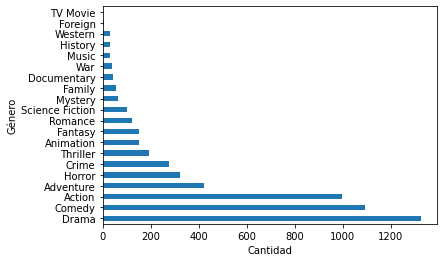

In [41]:
# plot the number of movies per genre vertically
df['genres'].value_counts().plot(kind='barh')
plt.ylabel('Género')
plt.xlabel('Cantidad')
plt.show()

## Budget histogram

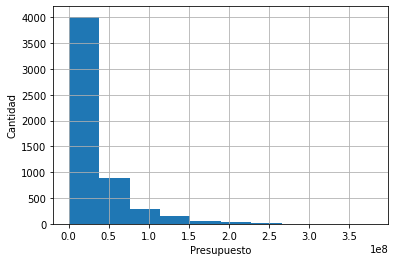

In [4]:
# plot a bugdet histogram
df['budget'].hist()
plt.xlabel('Presupuesto')
plt.ylabel('Cantidad')
plt.show()

## Información Faltante

<AxesSubplot:>

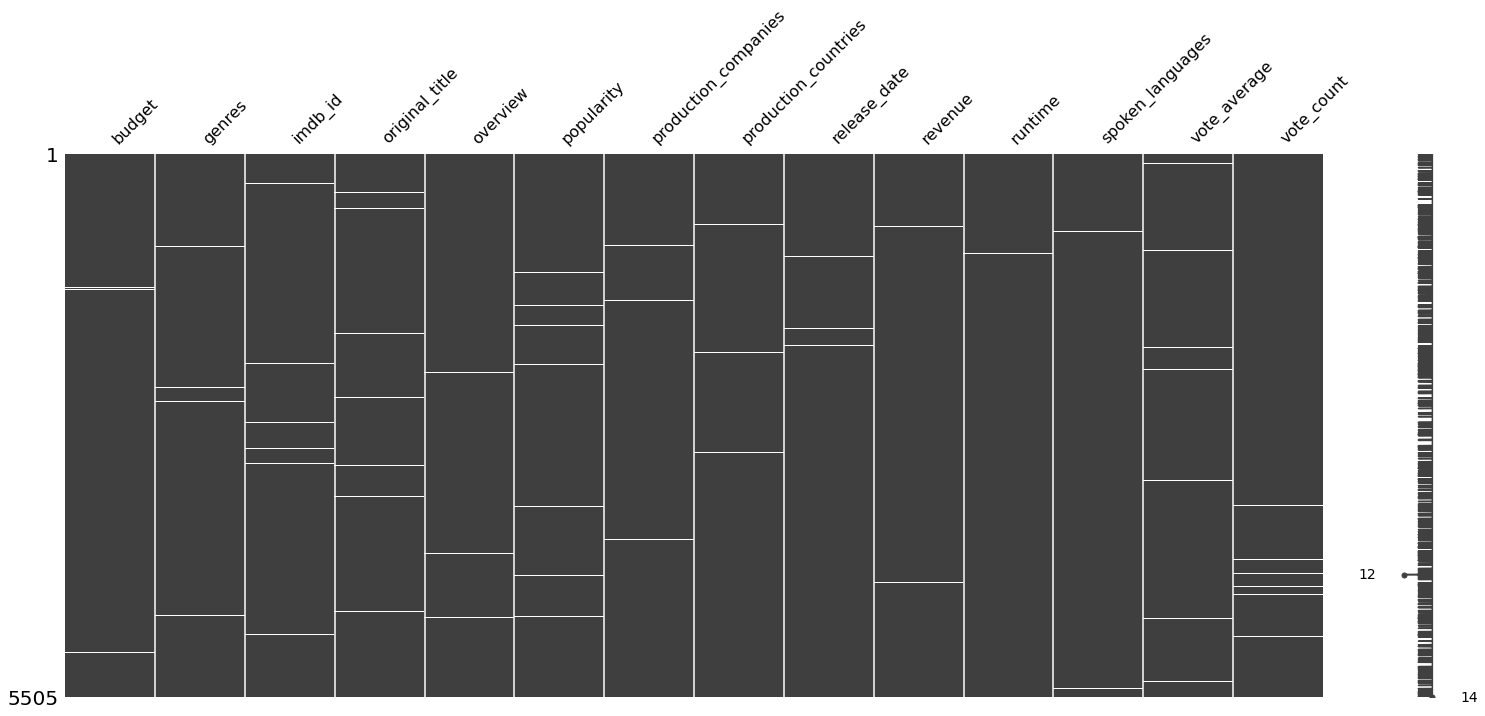

In [5]:
msno.matrix(df)

In [6]:
df.describe()

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
count,5.465000e+03,5464.000000,5476.000000,5479.000000,5.473000e+03,5472.000000,5460.000000,5463.000000,5468.000000
mean,3.124037e+07,9.256444,2.925676,1.357364,9.071296e+07,110.247442,1.482784,6.287937,724.587052
std,3.912379e+07,6.019158,2.166273,0.772884,1.578984e+08,21.470544,0.921282,0.902441,1193.095062
min,1.000000e+00,0.003013,0.000000,0.000000,1.001800e+04,26.000000,0.000000,0.000000,0.000000
25%,6.000000e+06,5.652154,1.000000,1.000000,8.038061e+06,95.750000,1.000000,5.700000,84.000000
50%,1.800000e+07,8.526302,2.000000,1.000000,3.106304e+07,106.000000,1.000000,6.300000,287.000000
75%,4.000000e+07,11.804164,4.000000,2.000000,1.026162e+08,120.000000,2.000000,6.900000,807.000000
max,3.800000e+08,54.581997,26.000000,12.000000,2.068224e+09,338.000000,9.000000,9.100000,14075.000000


## Box Plots

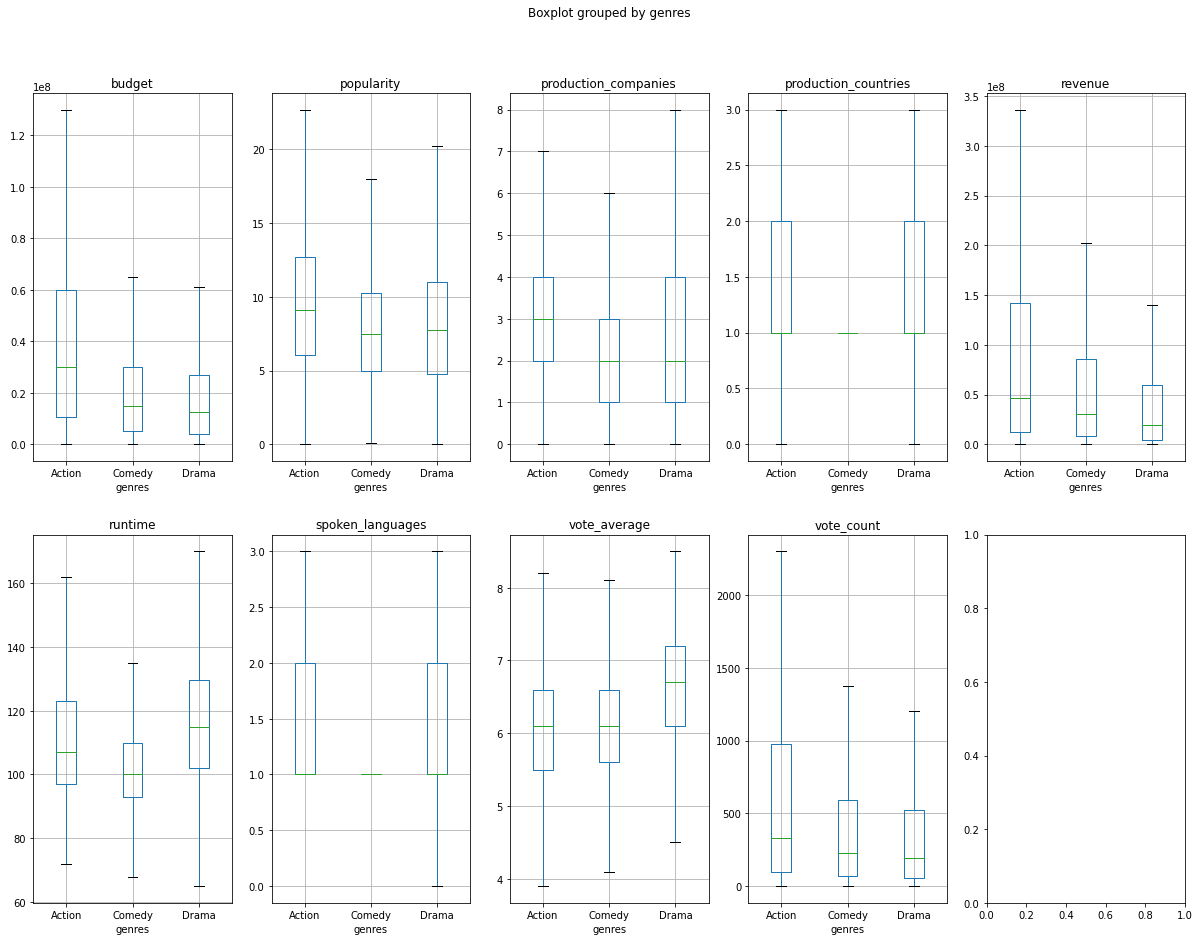

In [61]:
# make a boxplot for each numeric column in a different subplot

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 15))
i = 0
df = df[df['genres'].isin(['Action', 'Comedy', 'Drama'])]
for col in df.columns:
    if col in ['popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'production_companies', 'production_countries', 'spoken_languages']:
        # hacer un boxplot por genero
        df.boxplot(column=col, by='genres', ax=axes[i // 5, i % 5], showfliers=False)
        # df.boxplot(column=col, ax=axes[i // 5, i % 5])
        i += 1
# df.boxplot(column=['popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count'])
# df.boxplot(column='popularity', by='genres')

## Release Date analysis

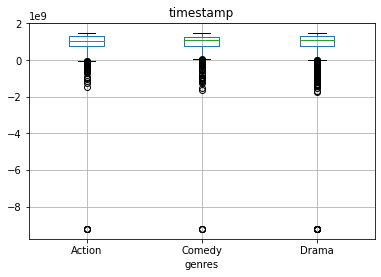

In [86]:
# map release_date to timestamp numeric value
df['release_date'] = pd.to_datetime(df['release_date'])
df['timestamp'] = df['release_date'].values.astype(np.int64) // 10 ** 9
df.boxplot(column='timestamp', by='genres', showfliers=True)
plt.suptitle('')
plt.savefig('plots/ts_boxplot.png')

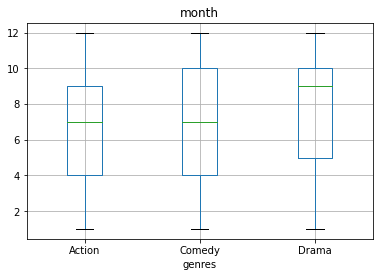

In [84]:
# get month from release_date
df['month'] = df['release_date'].dt.month
df.boxplot(column='month', by='genres', showfliers=True)
plt.suptitle('')
plt.savefig('plots/month_boxplot.png')

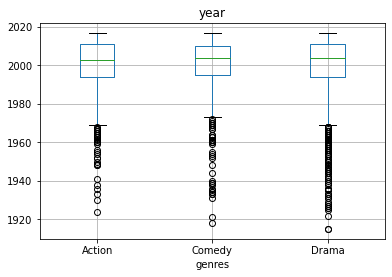

In [83]:
# get year from release_date
df['year'] = df['release_date'].dt.year
df.boxplot(column='year', by='genres', showfliers=True)
plt.suptitle('')
plt.savefig('plots/year_boxplot.png')

## Amount of Repeated Movies

In [9]:
print("Repeated rows: {}".format(df.duplicated().sum()))

Repeated rows: 263
